In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from scipy import stats

pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Insert csv to dataframes for both NXP and SiCepat
df_nxp = pd.read_csv('NXP (August Complete).csv', sep = ';')
df_sc = pd.read_csv('SC (August Complete).csv', sep = ';')

In [3]:
df_nxp

,﻿Creation Datetime,Delivery Success Datetime,Delivery Type,OD Pairing,Order ID,Parent Name,Receiver Region,Sender Region,Lead Time
0,01/08/22 00.02,02/08/22 18.02,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,781898369,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),1.75
1,01/08/22 00.06,03/08/22 10.43,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,781899868,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),2.44
2,01/08/22 00.10,02/08/22 09.01,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,781901896,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),1.37
3,01/08/22 00.10,02/08/22 12.57,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,781901884,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),1.53
4,01/08/22 00.10,02/08/22 12.58,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,781901883,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),1.53
...,...,...,...,...,...,...,...,...,...
171365,31/08/22 22.29,02/09/22 15.30,3 Days - Anytime,West Java (Tier 2) - West Java (Tier 2),810369003,Shopee Indonesia Marketplace,West Java (Tier 2),West Java (Tier 2),1.71
171366,31/08/22 22.29,02/09/22 15.29,3 Days - Anytime,West Java (Tier 2) - West Java (Tier 2),810369039,Shopee Indonesia Marketplace,West Java (Tier 2),West Java (Tier 2),1.71
171367,31/08/22 22.29,02/09/22 15.04,3 Days - Anytime,West Java (Tier 2) - West Java (Tier 2),810369042,Shopee Indonesia Marketplace,West Java (Tier 2),West Java (Tier 2),1.69
171368,31/08/22 22.29,02/09/22 15.04,3 Days - Anytime,West Java (Tier 2) - West Java (Tier 2),810369047,Shopee Indonesia Marketplace,West Java (Tier 2),West Java (Tier 2),1.69


In [4]:
df_sc

,﻿Creation Date,OD Pairing,Partner,POD receiver time,Receiver Region,Sender Region,Service,Tracking Id,Lead Time
0,01/08/22 09.13,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,02/08/22 09.18,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4064510775,1.00
1,01/08/22 10.09,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,02/08/22 11.45,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4064597862,1.07
2,01/08/22 09.20,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,02/08/22 13.05,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),HALU,4064508542,1.16
3,01/08/22 10.52,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,02/08/22 13.17,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4064644755,1.10
4,01/08/22 18.00,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,02/08/22 14.50,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),HALU,4064870288,0.87
...,...,...,...,...,...,...,...,...,...
2025,01/08/22 09.38,West Java (Tier 1) - Other,Shopee,05/08/22 10.42,Other,West Java (Tier 1),GOKIL,4064557668,4.04
2026,09/08/22 08.51,West Java (Tier 1) - Other,Shopee,11/08/22 14.20,Other,West Java (Tier 1),HALU,4069222405,2.23
2027,14/08/22 12.01,West Java (Tier 1) - Other,Shopee,17/08/22 11.13,Other,West Java (Tier 1),HALU,4071727831,2.97
2028,28/08/22 21.47,West Java (Tier 1) - Other,Shopee,31/08/22 15.07,Other,West Java (Tier 1),GOKIL,4078078483,2.72


In [5]:
# Check the general info for data types and any null datapoint
df_nxp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171370 entries, 0 to 171369
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ﻿Creation Datetime         171370 non-null  object 
 1   Delivery Success Datetime  171370 non-null  object 
 2   Delivery Type              171370 non-null  object 
 3   OD Pairing                 171370 non-null  object 
 4   Order ID                   171370 non-null  int64  
 5   Parent Name                171370 non-null  object 
 6   Receiver Region            171370 non-null  object 
 7   Sender Region              171370 non-null  object 
 8   Lead Time                  171370 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 11.8+ MB


In [6]:
# Change the Order ID into object type and check it again via general info
df_nxp['Order ID'] = df_nxp['Order ID'].astype('object')
df_nxp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171370 entries, 0 to 171369
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ﻿Creation Datetime         171370 non-null  object 
 1   Delivery Success Datetime  171370 non-null  object 
 2   Delivery Type              171370 non-null  object 
 3   OD Pairing                 171370 non-null  object 
 4   Order ID                   171370 non-null  object 
 5   Parent Name                171370 non-null  object 
 6   Receiver Region            171370 non-null  object 
 7   Sender Region              171370 non-null  object 
 8   Lead Time                  171370 non-null  float64
dtypes: float64(1), object(8)
memory usage: 11.8+ MB


In [7]:
# create new dataframe for Greater Jakarta - Greater Jakarta 
df_nxp_gj_gj = df_nxp[df_nxp['OD Pairing'] == 'Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1)'].copy().reset_index(drop = True)
df_nxp_gj_gj = df_nxp_gj_gj.sample(frac = 1).reset_index(drop = True)
df_nxp_gj_gj

,﻿Creation Datetime,Delivery Success Datetime,Delivery Type,OD Pairing,Order ID,Parent Name,Receiver Region,Sender Region,Lead Time
0,01/08/22 13.08,02/08/22 21.08,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,782425349,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),1.33
1,09/08/22 10.13,11/08/22 12.45,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,789387119,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),2.11
2,01/08/22 17.57,04/08/22 19.33,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,782844604,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),3.07
3,17/08/22 18.17,21/08/22 20.07,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,796833484,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),4.08
4,27/08/22 23.33,01/09/22 16.06,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,806991032,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),4.69
...,...,...,...,...,...,...,...,...,...
136794,02/08/22 18.34,06/08/22 13.13,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,783892676,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),3.78
136795,06/08/22 11.53,07/08/22 16.54,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,786766044,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),1.21
136796,15/08/22 06.53,16/08/22 20.27,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,794199717,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),1.56
136797,27/08/22 14.40,30/08/22 15.21,3 Days - Anytime,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,806506060,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),3.03


In [8]:
# create new dataframe for Greater Jakarta - West Java (Tier 2) 
df_nxp_gj_wj2 = df_nxp[df_nxp['OD Pairing'] == 'Greater Jakarta (Tier 1) - West Java (Tier 2)'].copy().reset_index(drop = True)
df_nxp_gj_wj2 = df_nxp_gj_wj2.sample(frac = 1).reset_index(drop = True)
df_nxp_gj_wj2

,﻿Creation Datetime,Delivery Success Datetime,Delivery Type,OD Pairing,Order ID,Parent Name,Receiver Region,Sender Region,Lead Time
0,08/08/22 19.26,11/08/22 12.21,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),788839772,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),2.70
1,02/08/22 09.29,04/08/22 10.47,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),783283931,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),2.05
2,04/08/22 09.06,06/08/22 13.50,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),785074786,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),2.20
3,25/08/22 08.34,27/08/22 15.22,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),804062614,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),2.28
4,27/08/22 08.03,28/08/22 18.17,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),806123575,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),1.43
...,...,...,...,...,...,...,...,...,...
12458,28/08/22 10.04,31/08/22 16.36,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),807030391,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),3.27
12459,08/08/22 14.53,10/08/22 14.33,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),788277801,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),1.99
12460,31/08/22 14.40,03/09/22 09.48,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),810022650,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),2.80
12461,25/08/22 15.34,29/08/22 13.00,3 Days - Anytime,Greater Jakarta (Tier 1) - West Java (Tier 2),804520049,Shopee Indonesia Marketplace,West Java (Tier 2),Greater Jakarta (Tier 1),3.89


In [9]:
# create new dataframe for West Java (Tier 1) - Greater Jakarta (Tier 1)
df_nxp_wj1_gj = df_nxp[df_nxp['OD Pairing'] == 'West Java (Tier 1) - Greater Jakarta (Tier 1)'].copy().reset_index(drop = True)
df_nxp_wj1_gj = df_nxp_wj1_gj.sample(frac = 1).reset_index(drop = True)
df_nxp_wj1_gj

,﻿Creation Datetime,Delivery Success Datetime,Delivery Type,OD Pairing,Order ID,Parent Name,Receiver Region,Sender Region,Lead Time
0,03/08/22 23.43,06/08/22 20.21,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),784949672,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.86
1,06/08/22 18.51,09/08/22 14.19,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),787142101,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.81
2,15/08/22 14.54,17/08/22 16.09,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),794847104,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.05
3,25/08/22 05.46,27/08/22 16.49,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),803988733,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.46
4,07/08/22 23.44,10/08/22 22.11,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),787486480,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.94
...,...,...,...,...,...,...,...,...,...
8062,27/08/22 11.56,29/08/22 19.04,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),806331119,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.30
8063,15/08/22 18.15,18/08/22 17.38,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),795283994,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.97
8064,29/08/22 16.35,31/08/22 16.27,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),808173006,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),1.99
8065,11/08/22 09.37,13/08/22 17.38,3 Days - Anytime,West Java (Tier 1) - Greater Jakarta (Tier 1),791312788,Shopee Indonesia Marketplace,Greater Jakarta (Tier 1),West Java (Tier 1),2.33


In [20]:
# Descriptive statistics for each OD pairing
print('Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1):\n', df_nxp_gj_gj['Lead Time'].describe())
print('==============================')
print('Greater Jakarta (Tier 1) - West Java (Tier 2):\n', df_nxp_gj_wj2['Lead Time'].describe())
print('==============================')
print('West Java (Tier 1) - Greater Jakarta (Tier 1):\n', df_nxp_wj1_gj['Lead Time'].describe())

Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1):
 count   136,799.00
mean          2.13
std           1.19
min           0.17
25%           1.30
50%           1.86
75%           2.47
max          23.05
Name: Lead Time, dtype: float64
Greater Jakarta (Tier 1) - West Java (Tier 2):
 count   12,463.00
mean         2.66
std          1.01
min          0.79
25%          2.10
50%          2.33
75%          3.13
max         17.43
Name: Lead Time, dtype: float64
West Java (Tier 1) - Greater Jakarta (Tier 1):
 count   8,067.00
mean        3.05
std         1.38
min         0.93
25%         2.15
50%         2.60
75%         3.41
max        15.32
Name: Lead Time, dtype: float64


In [21]:
# Check the general info for data types and any null datapoint
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ﻿Creation Date     2030 non-null   object 
 1   OD Pairing         2030 non-null   object 
 2   Partner            2030 non-null   object 
 3   POD receiver time  2030 non-null   object 
 4   Receiver Region    2030 non-null   object 
 5   Sender Region      2030 non-null   object 
 6   Service            2030 non-null   object 
 7   Tracking Id        2030 non-null   object 
 8   Lead Time          2030 non-null   float64
dtypes: float64(1), object(8)
memory usage: 142.9+ KB


In [22]:
# Change the Tracking ID into object type and check it again via general info
df_sc['Tracking Id'] = df_sc['Tracking Id'].astype('object')
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ﻿Creation Date     2030 non-null   object 
 1   OD Pairing         2030 non-null   object 
 2   Partner            2030 non-null   object 
 3   POD receiver time  2030 non-null   object 
 4   Receiver Region    2030 non-null   object 
 5   Sender Region      2030 non-null   object 
 6   Service            2030 non-null   object 
 7   Tracking Id        2030 non-null   object 
 8   Lead Time          2030 non-null   float64
dtypes: float64(1), object(8)
memory usage: 142.9+ KB


In [23]:
# create new SC dataframe for Greater Jakarta - Greater Jakarta 
df_sc_gj_gj = df_sc[df_sc['OD Pairing'] == 'Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1)'].copy().reset_index(drop = True)
df_sc_gj_gj = df_sc_gj_gj.sample(frac = 1).reset_index(drop = True)
df_sc_gj_gj

,﻿Creation Date,OD Pairing,Partner,POD receiver time,Receiver Region,Sender Region,Service,Tracking Id,Lead Time
0,12/08/22 18.09,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,15/08/22 13.13,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4071205309,2.79
1,26/08/22 11.25,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,01/09/22 11.41,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4077189749,6.01
2,27/08/22 00.52,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,03/09/22 20.56,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4077477806,7.84
3,27/08/22 18.07,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,29/08/22 10.04,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4077826154,1.66
4,18/08/22 07.58,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,20/08/22 14.29,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4073315494,2.27
...,...,...,...,...,...,...,...,...,...
1396,30/08/22 13.00,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,04/09/22 12.17,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4078938188,4.97
1397,05/08/22 13.44,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,06/08/22 18.32,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4066663387,1.20
1398,22/08/22 09.24,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,23/08/22 19.35,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),HALU,4075057234,1.42
1399,30/08/22 05.36,Greater Jakarta (Tier 1) - Greater Jakarta (Ti...,Shopee,05/09/22 12.12,Greater Jakarta (Tier 1),Greater Jakarta (Tier 1),REG,4078694791,6.28


In [24]:
# create new dataframe for Greater Jakarta - West Java (Tier 2) 
df_sc_gj_wj2 = df_sc[df_sc['OD Pairing'] == 'Greater Jakarta (Tier 1) - West Java (Tier 2)'].copy().reset_index(drop = True)
df_sc_gj_wj2 = df_sc_gj_wj2.sample(frac = 1).reset_index(drop = True)
df_sc_gj_wj2

,﻿Creation Date,OD Pairing,Partner,POD receiver time,Receiver Region,Sender Region,Service,Tracking Id,Lead Time
0,09/08/22 09.03,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,10/08/22 19.03,West Java (Tier 2),Greater Jakarta (Tier 1),GOKIL,4069253667,1.42
1,06/08/22 12.57,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,07/08/22 14.24,West Java (Tier 2),Greater Jakarta (Tier 1),HALU,4067080958,1.06
2,26/08/22 09.31,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,27/08/22 14.16,West Java (Tier 2),Greater Jakarta (Tier 1),HALU,4077080332,1.20
3,28/08/22 13.38,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,31/08/22 10.23,West Java (Tier 2),Greater Jakarta (Tier 1),REG,4077977998,2.86
4,08/08/22 22.06,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,11/08/22 12.31,West Java (Tier 2),Greater Jakarta (Tier 1),HALU,4068853960,2.60
...,...,...,...,...,...,...,...,...,...
176,10/08/22 07.57,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,12/08/22 11.38,West Java (Tier 2),Greater Jakarta (Tier 1),HALU,4069970460,2.15
177,13/08/22 07.55,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,14/08/22 17.17,West Java (Tier 2),Greater Jakarta (Tier 1),HALU,4071310260,1.39
178,03/08/22 10.32,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,06/08/22 17.48,West Java (Tier 2),Greater Jakarta (Tier 1),HALU,4065625042,3.30
179,09/08/22 10.39,Greater Jakarta (Tier 1) - West Java (Tier 2),Shopee,11/08/22 12.26,West Java (Tier 2),Greater Jakarta (Tier 1),HALU,4069472501,2.07


In [25]:
# create new dataframe for West Java (Tier 1) - Greater Jakarta (Tier 1)
df_sc_wj1_gj = df_sc[df_sc['OD Pairing'] == 'West Java (Tier 1) - Greater Jakarta (Tier 1)'].copy().reset_index(drop = True)
df_sc_wj1_gj = df_sc_wj1_gj.sample(frac = 1).reset_index(drop = True)
df_sc_wj1_gj

,﻿Creation Date,OD Pairing,Partner,POD receiver time,Receiver Region,Sender Region,Service,Tracking Id,Lead Time
0,27/08/22 19.13,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,02/09/22 13.29,Greater Jakarta (Tier 1),West Java (Tier 1),GOKIL,4077794892,5.76
1,13/08/22 11.52,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,14/08/22 16.45,Greater Jakarta (Tier 1),West Java (Tier 1),HALU,4071457638,1.20
2,29/08/22 08.35,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,31/08/22 15.35,Greater Jakarta (Tier 1),West Java (Tier 1),REG,4078230327,2.29
3,14/08/22 18.11,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,16/08/22 23.06,Greater Jakarta (Tier 1),West Java (Tier 1),HALU,4071805986,2.20
4,22/08/22 03.27,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,23/08/22 18.42,Greater Jakarta (Tier 1),West Java (Tier 1),HALU,4074887526,1.64
...,...,...,...,...,...,...,...,...,...
182,09/08/22 08.32,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,11/08/22 12.06,Greater Jakarta (Tier 1),West Java (Tier 1),HALU,4069150949,2.15
183,03/08/22 13.12,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,04/08/22 16.45,Greater Jakarta (Tier 1),West Java (Tier 1),HALU,4065734459,1.15
184,15/08/22 10.50,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,16/08/22 14.26,Greater Jakarta (Tier 1),West Java (Tier 1),HALU,4072158800,1.15
185,11/08/22 09.21,West Java (Tier 1) - Greater Jakarta (Tier 1),Shopee,12/08/22 18.50,Greater Jakarta (Tier 1),West Java (Tier 1),REG,4070535409,1.40


In [26]:
# Descriptive statistics for each OD pairing in SC
print('Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1):\n', df_sc_gj_gj['Lead Time'].describe())
print('==============================')
print('Greater Jakarta (Tier 1) - West Java (Tier 2):\n', df_sc_gj_wj2['Lead Time'].describe())
print('==============================')
print('West Java (Tier 1) - Greater Jakarta (Tier 1):\n', df_sc_wj1_gj['Lead Time'].describe())

Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1):
 count   1,401.00
mean        2.48
std         1.32
min         0.57
25%         1.42
50%         2.16
75%         3.10
max         8.80
Name: Lead Time, dtype: float64
Greater Jakarta (Tier 1) - West Java (Tier 2):
 count   181.00
mean      2.39
std       1.17
min       0.92
25%       1.42
50%       2.13
75%       3.01
max       8.14
Name: Lead Time, dtype: float64
West Java (Tier 1) - Greater Jakarta (Tier 1):
 count   187.00
mean      2.12
std       1.18
min       0.73
25%       1.26
50%       1.97
75%       2.39
max       8.64
Name: Lead Time, dtype: float64


In [27]:
# Create a sample that is close to the number of sample gathered from Si Cepat scraping
df_nxp_gj_gj_sample = df_nxp_gj_gj.sample(n = 1400).reset_index(drop = True)
df_nxp_gj_wj2_sample = df_nxp_gj_wj2.sample(n = 180).reset_index(drop = True)
df_nxp_wj1_gj_sample = df_nxp_wj1_gj.sample(n = 190).reset_index(drop = True)

In [28]:
# Descriptive statistics for each OD pairing in NXP sample
print('Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1):\n', df_nxp_gj_gj_sample['Lead Time'].describe())
print('==============================')
print('Greater Jakarta (Tier 1) - West Java (Tier 2):\n', df_nxp_gj_wj2_sample['Lead Time'].describe())
print('==============================')
print('West Java (Tier 1) - Greater Jakarta (Tier 1):\n', df_nxp_wj1_gj_sample['Lead Time'].describe())

Greater Jakarta (Tier 1) - Greater Jakarta (Tier 1):
 count   1,400.00
mean        2.05
std         1.09
min         0.63
25%         1.29
50%         1.75
75%         2.40
max         8.11
Name: Lead Time, dtype: float64
Greater Jakarta (Tier 1) - West Java (Tier 2):
 count   180.00
mean      2.66
std       1.02
min       1.08
25%       2.08
50%       2.29
75%       3.16
max       8.21
Name: Lead Time, dtype: float64
West Java (Tier 1) - Greater Jakarta (Tier 1):
 count   190.00
mean      2.83
std       1.14
min       0.95
25%       2.08
50%       2.53
75%       3.23
max       8.75
Name: Lead Time, dtype: float64


In [29]:
# Create a t-test to understand whether there is a significant difference between NXP and SC
gj_gj = stats.ttest_ind(a=df_nxp_gj_gj_sample['Lead Time'], b= df_sc_gj_gj['Lead Time'], equal_var=True)
gj_wj2 = stats.ttest_ind(a=df_nxp_gj_wj2_sample['Lead Time'], b= df_sc_gj_wj2['Lead Time'], equal_var=True)
wj1_gj = stats.ttest_ind(a=df_nxp_wj1_gj_sample['Lead Time'], b= df_sc_wj1_gj['Lead Time'], equal_var=True)

In [30]:
ttest_gj_gj = pd.DataFrame(gj_gj).T.rename({0: 'F Statistic', 1: 'P Value'}, axis = 1).rename({0: 'Greater Jakarta - Greater Jakarta'}, axis = 0)
ttest_gj_wj2 = pd.DataFrame(gj_wj2).T.rename({0: 'F Statistic', 1: 'P Value'}, axis = 1).rename({0: 'Greater Jakarta - West Java (Tier 2)'}, axis = 0)
ttest_wj1_gj = pd.DataFrame(wj1_gj).T.rename({0: 'F Statistic', 1: 'P Value'}, axis = 1).rename({0: 'West Java (Tier 1) - Greater Jakarta'}, axis = 0)

In [31]:
df_ttest_all = pd.concat(objs = [ttest_gj_gj, ttest_gj_wj2, ttest_wj1_gj], axis = 0, ignore_index = False)

In [32]:
df_ttest_all

,F Statistic,P Value
Greater Jakarta - Greater Jakarta,-9.28,0.00
Greater Jakarta - West Java (Tier 2),2.33,0.02
West Java (Tier 1) - Greater Jakarta,5.91,0.00


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/l

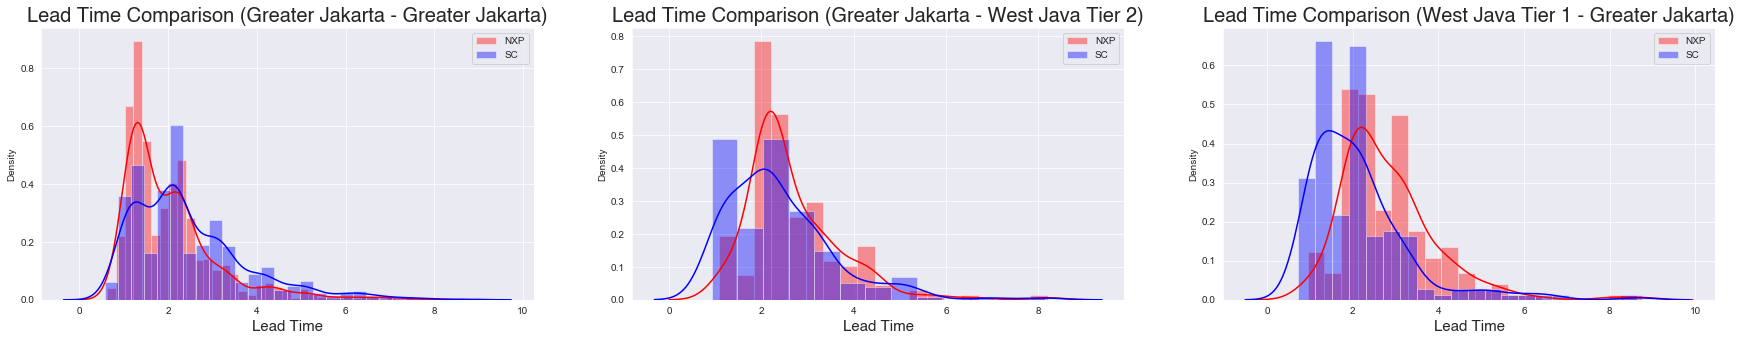

In [37]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

sns.distplot(x = df_nxp_gj_gj_sample['Lead Time'], kde = True, color = 'Red', label = 'NXP', ax = axs[0])
sns.distplot(x = df_sc_gj_gj['Lead Time'], kde = True, color = 'Blue', label = 'SC', ax = axs[0])
plt.legend()

sns.distplot(x = df_nxp_gj_wj2_sample['Lead Time'], kde = True, color = 'Red', label = 'NXP', ax = axs[1])
sns.distplot(x = df_sc_gj_wj2['Lead Time'], kde = True, color = 'Blue', label = 'SC', ax = axs[1])

sns.distplot(x = df_nxp_wj1_gj_sample['Lead Time'], kde = True, color = 'Red', label = 'NXP', ax = axs[2])
sns.distplot(x = df_sc_wj1_gj['Lead Time'], kde = True, color = 'Blue', label = 'SC', ax = axs[2])

axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')

axs[0].set_title("Lead Time Comparison (Greater Jakarta - Greater Jakarta)", fontname="Helvetica",
                 fontsize = 20)
axs[1].set_title("Lead Time Comparison (Greater Jakarta - West Java Tier 2)", fontname="Helvetica",
                 fontsize = 20)
axs[2].set_title("Lead Time Comparison (West Java Tier 1 - Greater Jakarta)", fontname="Helvetica",
                 fontsize = 20)

axs[0].set_xlabel('Lead Time', fontname = 'Helvetica', fontsize = 15)
axs[1].set_xlabel('Lead Time', fontname = 'Helvetica', fontsize = 15)
axs[2].set_xlabel('Lead Time', fontname = 'Helvetica', fontsize = 15)

plt.savefig('lead_time_comparison_example.png')

In [38]:
from numpy import std, mean, sqrt

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [39]:
cohen_gj_gj = cohen_d(df_nxp_gj_gj_sample['Lead Time'], df_sc_gj_gj['Lead Time'])
cohen_gj_wj2 = cohen_d(df_nxp_gj_wj2_sample['Lead Time'], df_sc_gj_wj2['Lead Time'])
cohen_wj1_gj = cohen_d(df_nxp_wj1_gj_sample['Lead Time'], df_sc_wj1_gj['Lead Time'])

In [40]:
cohen_all = [cohen_gj_gj, cohen_gj_wj2, cohen_wj1_gj]
cohen_all

[-0.3505562039216694, 0.24538907150291037, 0.6091080387783601]